In [1]:
import pandas as pd
import numpy as np

import datetime

In [2]:
hares = pd.read_csv('https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-bnz.55.22&entityid=f01f5d71be949b8c700b6ecd1c42c701')
hares

,date,time,grid,trap,l_ear,r_ear,sex,age,weight,hindft,notes,b_key,session_id,study
0,11/26/1998,NaN,bonrip,1A,414D096A08,NaN,NaN,NaN,1370.0,160.0,NaN,917.0,51,Population
1,11/26/1998,NaN,bonrip,2C,414D320671,NaN,M,NaN,1430.0,NaN,NaN,936.0,51,Population
2,11/26/1998,NaN,bonrip,2D,414D103E3A,NaN,M,NaN,1430.0,NaN,NaN,921.0,51,Population
3,11/26/1998,NaN,bonrip,2E,414D262D43,NaN,NaN,NaN,1490.0,135.0,NaN,931.0,51,Population
4,11/26/1998,NaN,bonrip,3B,414D2B4B58,NaN,NaN,NaN,1710.0,150.0,NaN,933.0,51,Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,8/8/2002,18:00:00,bonrip,1b,1201,1202,NaN,NaN,1400.0,NaN,NaN,63.0,64,Population
3376,8/8/2002,6:00:00,bonrip,4b,1201,1202,NaN,NaN,NaN,NaN,NaN,63.0,64,Population
3377,8/7/2002,NaN,bonrip,4b,1217,1218,NaN,NaN,1000.0,134.0,NaN,69.0,64,Population
3378,8/8/2002,NaN,bonrip,6d,1217,1218,NaN,NaN,990.0,NaN,NaN,69.0,64,Population


In [20]:
hares.grid.unique()
#hares.trap.unique()

array(['bonrip', 'bonbs', 'Bonbs', 'bonmat', 'bonmat '], dtype=object)

In [22]:
hares.grid.value_counts(dropna=False)

bonrip     2030
bonbs       929
bonmat      260
Bonbs       152
bonmat        9
Name: grid, dtype: int64

In [24]:
conditions = [hares.grid == 'bonrip',
              (hares.grid == 'bonmat') | (hares.grid == 'bonmat ') | (hares.grid == 'bonbs') | (hares.grid == 'Bonbs')]

choices = ['Bonanza Riparian', 'Bonanza Mature']
hares['grid_clean'] = np.select(conditions,choices,default=np.nan)
hares.grid_clean.value_counts()

Bonanza Riparian    2030
Bonanza Mature      1350
Name: grid_clean, dtype: int64

In [3]:
hares.sex.value_counts(dropna=False)

F      1161
M       730
f       556
m       515
NaN     352
?        40
F?       10
f         4
m         4
f?        3
M?        2
m?        2
pf        1
Name: sex, dtype: int64

In [4]:
hares.sex.unique()

array([nan, 'M', 'F', '?', 'F?', 'M?', 'pf', 'm', 'f', 'f?', 'm?', 'f ',
       'm '], dtype=object)

In [25]:
conditions = [(hares.sex == 'F') | (hares.sex == 'f') | (hares.sex == 'f '),
              (hares.sex == 'M') | (hares.sex == 'm') | (hares.sex == 'm ')]

choices = ['female', 'male']

hares['sex_simple'] = np.select(conditions, choices, default=np.nan)

hares.sex_simple.value_counts(dropna=False)

female    1721
male      1249
nan        410
Name: sex_simple, dtype: int64

In [42]:
hares.dtypes

date           object
time           object
grid           object
trap           object
l_ear          object
r_ear          object
sex            object
age            object
weight        float64
hindft        float64
notes          object
b_key         float64
session_id      int64
study          object
dtype: object

In [43]:
type(hares.iat[0,0])

str

In [6]:
hares.date = pd.to_datetime(hares.date)
hares.dtypes

date              datetime64[ns]
time                      object
grid                      object
trap                      object
l_ear                     object
r_ear                     object
sex                       object
age                       object
weight                   float64
hindft                   float64
notes                     object
b_key                    float64
session_id                 int64
study                     object
sex_simplified            object
dtype: object

In [11]:
hares = hares.assign(year = hares.date.dt.year,
                     month = hares.date.dt.month)

In [12]:
hares.columns

Index(['date', 'time', 'grid', 'trap', 'l_ear', 'r_ear', 'sex', 'age',
       'weight', 'hindft', 'notes', 'b_key', 'session_id', 'study',
       'sex_simplified', 'year', 'month'],
      dtype='object')

In [15]:
hares.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012])

<AxesSubplot:xlabel='year'>

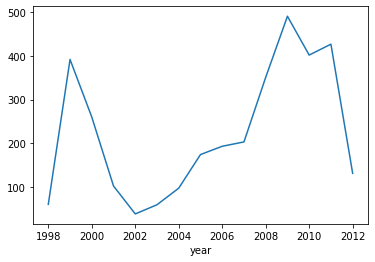

In [19]:
hares.groupby('year').count().date.plot()